<a href="https://colab.research.google.com/github/AnyueWang/ExerciseProjects/blob/main/singleclass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

# data set: Food101 (only use pizza and steak)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-12-21 15:05:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   163MB/s    in 0.6s    

2022-12-21 15:05:27 (163 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 21 15:05 .
drwxr-xr-x 1 root root 4096 Dec 21 15:05 ..
drwxr-xr-x 4 root root 4096 Dec 21 15:05 test
drwxr-xr-x 4 root root 4096 Dec 21 15:05 train


In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

['3882444.jpg']
Image shape: (512, 512, 3)


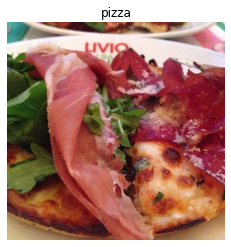

In [10]:
img = view_random_image(target_dir='pizza_steak/train/',
             target_class='pizza')

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 93, 186, 168],
        [ 95, 188, 170],
        [ 93, 186, 168],
        ...,
        [238, 240, 219],
        [244, 241, 222],
        [254, 247, 229]],

       [[ 93, 184, 167],
        [ 93, 184, 167],
        [ 89, 182, 164],
        ...,
        [230, 235, 213],
        [241, 240, 220],
        [250, 247, 228]],

       [[ 93, 181, 165],
        [ 92, 180, 164],
        [ 89, 177, 161],
        ...,
        [214, 226, 204],
        [227, 235, 214],
        [241, 244, 225]],

       ...,

       [[217, 194, 144],
        [215, 192, 140],
        [213, 190, 138],
        ...,
        [215, 193, 179],
        [216, 194, 180],
        [221, 199, 185]],

       [[218, 195, 143],
        [217, 194, 142],
        [216, 193, 141],
        ...,
        [214, 192, 179],
        [211, 192, 178],
        [215, 196, 182]],

       [[222, 196, 145],
        [224, 198, 147],
        [224, 198, 147],
        ...,
        [212, 192, 18

### An end-to-end example

A convolutional neural network to find patterns in our images, more specifically:
* load our images
* preprocess our images
* build a CNN to find patterns in our images
* compile our CNN
* fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                        batch_size=32,
                        target_size=(224,224),
                        class_mode='binary',
                        seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                        batch_size=32,
                        target_size=(224,224),
                        class_mode='binary',
                        seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
               kernel_size=3,
               activation='relu',
               input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                 padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

history_1 = model_1.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=valid_data,
             validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 118s 2s/step - loss: 0.5474 - accuracy: 0.7200 - val_loss: 0.3862 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 123s 3s/step - loss: 0.4124 - accuracy: 0.8193 - val_loss: 0.3343 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 123s 3s/step - loss: 0.3885 - accuracy: 0.8320 - val_loss: 0.3165 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 115s 2s/step - loss: 0.3395 - accuracy: 0.8567 - val_loss: 0.3194 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 124s 3s/step - loss: 0.2977 - accuracy: 0.8793 - val_loss: 0.3067 - val_accuracy: 0.8780


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(400,activation='relu'),
    tf.keras.layers.Dense(400,activation='relu'),
    tf.keras.layers.Dense(400,activation='relu'),
    tf.keras.layers.Dense(400,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

history_2 = model_2.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=valid_data,
             validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 30s 625ms/step - loss: 7.6470 - accuracy: 0.5720 - val_loss: 0.5043 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 30s 627ms/step - loss: 0.5300 - accuracy: 0.7507 - val_loss: 0.5106 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 29s 622ms/step - loss: 0.5846 - accuracy: 0.7307 - val_loss: 0.5806 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 30s 646ms/step - loss: 0.5109 - accuracy: 0.7693 - val_loss: 0.5088 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 30s 629ms/step - loss: 0.4544 - accuracy: 0.8013 - val_loss: 0.5853 - val_accuracy: 0.7020


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 400)               60211600  
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 400)               160400    
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 60,693,201
Trainable params: 60,693,201


In [16]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data, 
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=valid_data,
             validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 363ms/step - loss: 3.6129 - accuracy: 0.6120 - val_loss: 1.1607 - val_accuracy: 0.6480
Epoch 2/5
47/47 [==============================] - 16s 347ms/step - loss: 1.0524 - accuracy: 0.6880 - val_loss: 0.7015 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 16s 345ms/step - loss: 0.5484 - accuracy: 0.7780 - val_loss: 0.4757 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 16s 342ms/step - loss: 0.5940 - accuracy: 0.7467 - val_loss: 0.7682 - val_accuracy: 0.7160
Epoch 5/5
47/47 [==============================] - 16s 344ms/step - loss: 0.6592 - accuracy: 0.7293 - val_loss: 0.4956 - val_accuracy: 0.7820


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification:

1. become one with the data (visualize)
2. preprocess the data 
3. create a model (start with a baseline)
4. fit the model
5. evaluate the model
6. adjust different parameters and improve the model
7. repeat until satisfied

['1594719.jpg']
Image shape: (512, 512, 3)
['121834.jpg']
Image shape: (341, 512, 3)


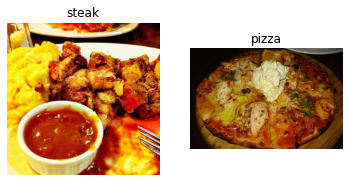

In [19]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [20]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

Turn the data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

Reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.




In [21]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                        target_size=(224,224),
                        class_mode='binary',
                        batch_size=32)

test_Data = test_datagen.flow_from_directory(directory=test_dir,
                       target_size=(224,224),
                       class_mode='binary',
                       batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [25]:
len(train_data)

47

In [26]:
1500/32

46.875

In [27]:
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [28]:
images[7]

array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.10980393],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.2627451 , 0.13725491, 0.19607845],
        [0.3254902 , 0.20000002, 0.24313727],
        [0.41960788, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.1254902 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5568628 ],
        [0.6039216 , 0.56078434, 0.5372549 ],
        [0.6039216 , 0

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# benchmark
model_4 = Sequential([
    Conv2D(filters=10,
       kernel_size=3,
       strides=1,
       padding='valid',
       activation='relu',
       input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [33]:
import numpy as np
40/np.sqrt(30)

7.302967433402215

In [34]:
model_4.compile(loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy'])

In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_4 = model_4.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_Data,
             validation_steps=len(test_Data))

Epoch 1/5
47/47 [==============================] - 140s 3s/step - loss: 1.2189 - accuracy: 0.6413 - val_loss: 0.4616 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 141s 3s/step - loss: 0.4560 - accuracy: 0.7987 - val_loss: 0.3835 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 138s 3s/step - loss: 0.3434 - accuracy: 0.8653 - val_loss: 0.3929 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 139s 3s/step - loss: 0.2246 - accuracy: 0.9247 - val_loss: 0.3528 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 144s 3s/step - loss: 0.0745 - accuracy: 0.9827 - val_loss: 0.4324 - val_accuracy: 0.8120


In [37]:
model_1.evaluate(test_Data)

16/16 [==============================] - 12s 737ms/step - loss: 0.3067 - accuracy: 0.8780


[0.30672481656074524, 0.878000020980835]

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

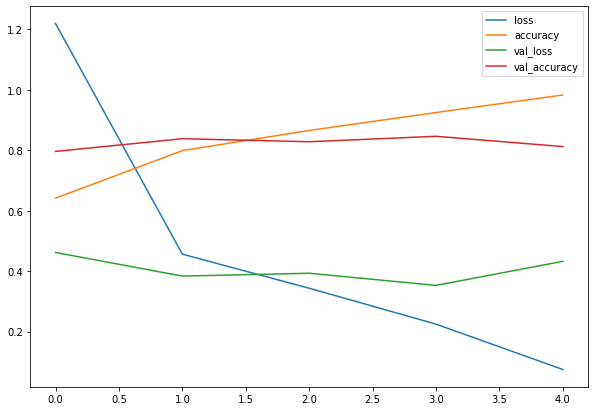

In [39]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [40]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

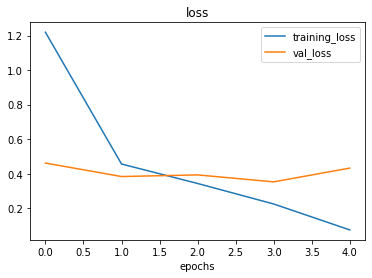

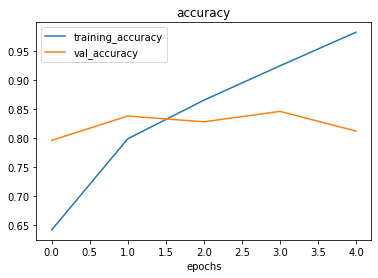

In [41]:
plot_loss_curves(history_4)

### adjusting the model parameters

fitting a learning model comes in 3 steps:

0. create a baseline
1. beat the baseline by overfitting a larger model
2. reduce overfitting

ways to induce overfitting:
 * increase the number of conv layers
 * increase the number of conv filters
 * add another dense layer to the output of our flattened layer

ways to reduce overfitting:
* add data augmentation
* add regularization layers (such as MaxPool2D)
* add more data

In [42]:
model_5 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [43]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [44]:
model_5.compile(loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy'])

In [45]:
history_5 = model_5.fit(train_data,
             steps_per_epoch=len(train_data),
             epochs=5,
             validation_data=test_Data,
             validation_steps=len(test_Data))

Epoch 1/5
47/47 [==============================] - 60s 1s/step - loss: 0.6388 - accuracy: 0.6247 - val_loss: 0.4747 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 61s 1s/step - loss: 0.4627 - accuracy: 0.7827 - val_loss: 0.3995 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.4175 - accuracy: 0.8180 - val_loss: 0.3469 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.3957 - accuracy: 0.8260 - val_loss: 0.3497 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 59s 1s/step - loss: 0.3640 - accuracy: 0.8433 - val_loss: 0.3461 - val_accuracy: 0.8580


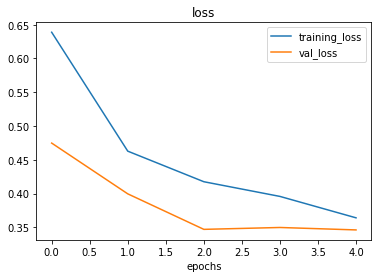

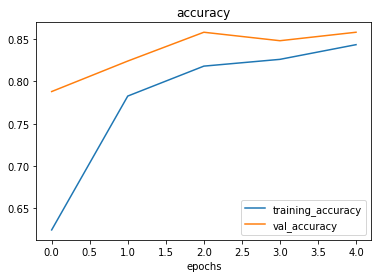

In [46]:
plot_loss_curves(history_5)

### data augmentation

In [47]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                        rotation_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        width_shift_range=0.2,
                        height_shift_range=0.3,
                        horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [48]:
print('augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                   target_size=(224,224),
                                   batch_size=32,
                                   class_mode='binary',
                                   shuffle=False) # for demonstration purpose only

train_data = train_datagen.flow_from_directory(train_dir,
                         target_size=(224,224),
                         batch_size=32,
                         class_mode='binary',
                         shuffle=False)

print('non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='binary')

augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
non-augmented test data:
Found 500 images belonging to 2 classes.


In [49]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 16


(-0.5, 223.5, 223.5, -0.5)

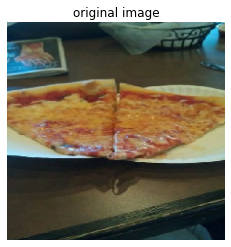

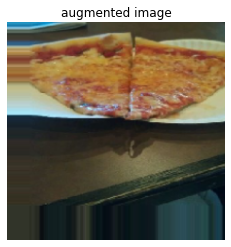

In [50]:
import random
random_number = random.randint(0,32)
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'augmented image')
plt.axis(False)

In [51]:
model_6 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [52]:
model_6.compile(loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy'])

In [53]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

In [54]:
history_6 = model_6.fit(train_data_augmented,
             steps_per_epoch=len(train_data_augmented),
             epochs=5,
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 74s 2s/step - loss: 0.7083 - accuracy: 0.4860 - val_loss: 0.6848 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 71s 2s/step - loss: 0.6913 - accuracy: 0.5260 - val_loss: 0.6720 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.7522 - accuracy: 0.5907 - val_loss: 0.6686 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 71s 2s/step - loss: 0.6860 - accuracy: 0.5893 - val_loss: 0.6455 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 73s 2s/step - loss: 0.6821 - accuracy: 0.6020 - val_loss: 0.7659 - val_accuracy: 0.5000


In [55]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                       target_size=(224,224),
                                       class_mode='binary',
                                       batch_size=32,
                                       shuffle=True)


Found 1500 images belonging to 2 classes.


In [56]:
model_7 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
             steps_per_epoch=len(train_data_augmented_shuffled),
             epochs=5,
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 75s 2s/step - loss: 0.6614 - accuracy: 0.5767 - val_loss: 0.6372 - val_accuracy: 0.5640
Epoch 2/5
47/47 [==============================] - 72s 2s/step - loss: 0.5705 - accuracy: 0.7013 - val_loss: 0.5492 - val_accuracy: 0.6780
Epoch 3/5
47/47 [==============================] - 73s 2s/step - loss: 0.5320 - accuracy: 0.7247 - val_loss: 0.3875 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 73s 2s/step - loss: 0.5105 - accuracy: 0.7600 - val_loss: 0.3628 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 74s 2s/step - loss: 0.4801 - accuracy: 0.7780 - val_loss: 0.3711 - val_accuracy: 0.8440


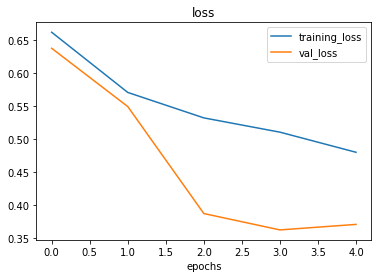

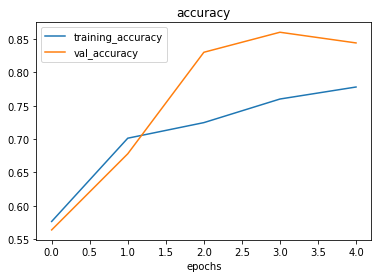

In [58]:
plot_loss_curves(history_7)

### Repeat until satisfied

* increase the number of model layers (e.g., add more Conv2D/MaxPool2D layers)
* increase the number of filters in each convolutional layer (e.g., from 10 to 32 or even 64)
* train for longer (more epochs)
* find an ideal learning rate
* get more data (give the model more opportunities to learn)
* use transfer learning to leverage what another image model has learned and adjust it for our own use case

In [59]:
print(class_names)

['pizza' 'steak']


In [60]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-12-21 16:11:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.08s   

2022-12-21 16:11:56 (23.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [62]:
steak = mpimg.imread('03-steak.jpeg')

(-0.5, 3023.5, 4031.5, -0.5)

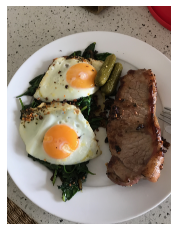

In [65]:
plt.imshow(steak)
plt.axis(False)

In [66]:
steak.shape

(4032, 3024, 3)

**Note:** when you train a neural network and you want to make a prediction with it on your own custom data, it's important to preprocess the data into the same format as the data your model was trained on.

In [69]:
def load_and_prep_image(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  img = img/255.
  return img

In [70]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [73]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 36ms/step


In [74]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [76]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 67ms/step


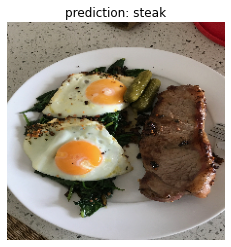

In [77]:
pred_and_plot(model_7,'03-steak.jpeg')

--2022-12-21 16:36:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-12-21 16:36:44 (36.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 63ms/step


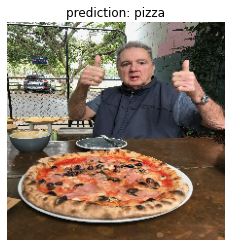

In [78]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7,'03-pizza-dad.jpeg')